# NumPy Based CNN block 

##   Outline of the Assignment

we will be implementing the building blocks of a convolutional neural network

1. **`zero padding`**

2. **`convolution : Forward`**

3. **`convolution : Backwrd`**

4. **`Max pooling`**

5. **`Batch Normalization in CNN `**



**Note** that for every forward function, there is its corresponding backward equivalent. 

In [1]:
%tensorflow_version 1.x

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


## 1. Zero Padding

Zero-padding adds zeros around the border of an image:

**Exercise**  : Implement the following function, which pads all the images of a batch of examples X with zeros.

shape of X and its zero pad array is :


$$ X : (N, C, i_h, i_w)   $$
$$  \text{zeropad}(X) : (N, C, i_h + 2*ph, i_w + 2*pw)$$

In [5]:
def zero_padding(X, padding):
    zero_pad = np.zeros((X.shape[0], X.shape[1] , 2*padding[0]+X.shape[2], 2*padding[1]+X.shape[3]))
    zero_pad[:,:,padding[0]: padding[0]+X.shape[2], padding[1]: padding[1]+X.shape[3]] = X    
    return zero_pad

implementation is correct
shape of x is : (2, 3, 4, 4)
shape of x_pad is : (2, 3, 10, 8)


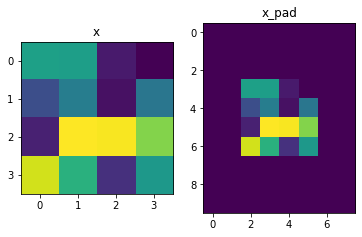

In [6]:
#test zero_padding function
np.random.seed(1968)

x = np.random.rand(2, 3 ,4, 4)
padding = (3, 2)
x_pad = zero_padding(x, padding)


assert x_pad.shape==(x.shape[0], x.shape[1], x.shape[2] + 2*padding[0], x.shape[3] + 2*padding[1])
assert np.all(x_pad[:, :, padding[0]:padding[0]+x.shape[2], padding[1]:padding[1]+x.shape[3]]==x)

print("implementation is correct")
print("shape of x is :", x.shape)
print("shape of x_pad is :", x_pad.shape)

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, 0, :, :])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, 0, :, :])

## 2.convolution : Forward

In this Exercise, we implement convolutional neural networks using the NumPy library only.

The input X,W are the input of the convolutional layer and the shape of X,W are $(N, C, i_h, i_w)$ , $(F, C, f_h, f_w)$ respectively and The return  value O is the output of the convolutional layer and the shape is $(N, F, O_h, O_w)$ where :

$$\text{stride} : (s_h,s_w)$$

$$\text{padding} : (p_h,p_w)$$

$$O_w =\lfloor \frac{i_w - f_w + 2*p_w}{s_w} \rfloor + 1$$

$$O_h = \lfloor\frac{i_h - f_h + 2*p_h}{s_h}\rfloor + 1$$
$$O(b,f, i ,j)=\sum_{r=0}^{C-1}\sum_{k=0}^{f_h-1}\sum_{l=0}^{f_w-1} W(f,r,k,l) X(b,r,s_h *i +k, s_w  *j +l)$$

In [7]:
def convolution2D(X, W, stride, padding):
    """
    A implementation of the forward pass for a convolutional layer.
    
    The input consists of N data points, each with C channels, height IH and
    width IW .We convolve each input with F different filters, where each filter
    spans all C channels and has height FH and width FW.
    
    
    inputs:
     - X : input data of shape (N, C, IH, IW)
     - W : Filter weight of shape (F, C, FH, FW)
     - stride : a tuple of 2 integer (sh, sw)
     - padding :a tuple of 2 integer (ph, pw)
     
    return:
     - out : Output data, of shape (N, F, OH, OW) where OH and OW given by
     
     OH= 1 + int ( (IH + 2*ph - FH)/ sh )
     OW= 1 + int ( (IW + 2*pw - FW)/ sw )
    
    """
    
    N, C, IH, IW = X.shape
    F, C, FH, FW = W.shape
    sh, sw = stride
    ph, pw = padding
    OH = 1 + int ( (IH + 2*ph - FH)/ sh )
    OW = 1 + int ( (IW + 2*pw - FW)/ sw )
    #out = np.zeros((OH, OW, N, F))
    out = np.zeros((N, F, OH, OW))
    X_pad = zero_padding(X, padding)

    print(stride)
    print(padding)
    print(X.shape)
    print(X_pad.shape)
    print((N, F, OH, OW))
    
    for b in range(N):
        for f in range(F):
            for i in range(OH):
                for j in range(OW):
                    for c in range(C):
                        for k in range(FH):
                            for l in range(FW):
                                out[b,f,i,j] += W[ f, c, k, l] * X_pad[ b, c, sh * i + k, sw * j + l]

    
    out = out.reshape(N, F, OH, OW)
    return out
    
    

To test implementation, we will compare the results  with tensorflow function

In [8]:
np.random.seed(1973)
param1 = {'X':np.random.rand(2, 3, 23, 20), 'W':np.random.rand(7, 3, 6, 6), 'stride':(3, 6), 'padding':(2, 3)}
x_tf = np.pad(param1['X'], ((0, 0), (0, 0), (2, 2), (3, 3)), 'constant', constant_values=0)


conv_numpy = convolution2D(**param1)
conv = tf.nn.conv2d(tf.transpose(x_tf, [0 ,2, 3, 1]), tf.transpose(param1['W'], (2, 3, 1, 0)), [1, 3, 6, 1], 'VALID')
conv = tf.transpose(conv, (0, 3, 1, 2))

with tf.Session() as sess:
    conv = sess.run(conv)


assert conv.shape==conv_numpy.shape
print("Error :", (np.sum(conv - conv_numpy)**2))
print("output shape :", conv_numpy.shape)


(3, 6)
(2, 3)
(2, 3, 23, 20)
(2, 3, 27, 26)
(2, 7, 8, 4)
Error : 3.865418435582958e-29
output shape : (2, 7, 8, 4)


** Expected Output: **
<table>
    <tr>
        <td>
            **out shape**
        </td>
        <td>
            (2, 7, 8, 4)
        </td>
    </tr>
    <tr>
        <td>
            **ERROR**
        </td>
        <td>
            2.5559093329160782e-28
       </td>
    </tr>
    
</table>


## 3.convolution : Backward

### 3.1 - Backward  w.r.t. filter 

This is the formula for computing a $\frac{\partial L}{\partial W}$ for a single $W(f^\prime,c^\prime,k^\prime ,l^\prime )$ that $W$ is 4-D array as a filter in convolution operation with shape $(F,C,f_h,f_w)$ 

$$\frac{\partial L}{\partial W(f^\prime,c^\prime,k^\prime ,l^\prime )} = \sum_{b=0}^{N-1}\left (\sum_{i=0}^{O_h-1}\sum_{j=0}^{O_w-1} \frac{\partial L}{\partial O(b,f^\prime,i,j)} \frac{\partial O(i,j)}{\partial W(f^\prime,c^\prime,k^\prime ,l^\prime )}\right ) = \sum_{b=0}^{N-1}\left (\sum_{i=0}^{O_w-1}\sum_{j=0}^{O_h-1} \frac{\partial L}{\partial O(b,f^\prime,i,j)}  X(b,c^\prime, s_h*i +k^\prime, s_w*j +l^\prime) \right )$$


In [9]:
def convolution2D_backward_filter(out_grad, X, W, stride):
    """
    A implementation of the backward pass for a convolutional layer.
    
    inputs:
     - out_grad  : gradient of the Loss with respect to the output of the conv layer with shape (N, F, OW, OH)
     - X : input data of shape (N, C, IH, IW)
     - W : Filter weight of shape (F, C, FH, FW)
     - stride : a list of [sh, sw]
     
    return:
     - dW : Gradient with respect to W
    
    """
    N, C, IH, IW = X.shape
    F, C, FH, FW = W.shape
    sh, sw = stride
    _ ,_ , OH, OW = out_grad.shape

    dW = np.zeros((F,C,OH,OW))
    
    for f in range(F):
        for c in range(C):
            for k in range(OW):
                for l in range(OH):
                    for b in range(N):
                        for i in range(OW):
                            for j in range(OH):
                                dW[f, c, k, l] += out_grad[b, f, i, j] * X[b, c, sh * i + k, sw * j + l]

    
    return dW
    
    

In [10]:
np.random.seed(1345)

param = {'X':np.random.rand(2, 3, 10,10), 'W':np.random.rand(7, 3, 4, 4), 'stride':(2, 2)}
c_1 = np.ones((2, 7, 4, 4))   
dw = convolution2D_backward_filter(c_1, **param)



w = tf.Variable(tf.transpose(param['W'],(2, 3, 1, 0)),name='v')
c = tf.nn.conv2d(tf.transpose(param['X'],[0, 2, 3, 1]), w, [1, 2, 2, 1], 'VALID')
loss = tf.reduce_sum(c)
dw_tf = tf.gradients(loss, w)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    dw_tf = sess.run(dw_tf)



dw = np.transpose(dw, (2, 3 ,1, 0))
print("Error  :", np.sum((dw-dw_tf[0])**2))
print("dW_tf  :", np.sum(dw_tf[0]))
print("dW  :", np.sum(dw))

Error  : 7.636173562539394e-28
dW_tf  : 5340.576411697173
dW  : 5340.576411697173


** Expected Output: **
<table>
    <tr>
        <td>
            **dW_tf**
        </td>
        <td>
            5340.576411697173
        </td>
    </tr>
    <tr>
        <td>
            **dW**
        </td>
        <td>
            5340.576411697173
        </td>
    </tr>
    <tr>
        <td>
            **Error**
        </td>
        <td>
            2.473867798773093e-27
 </td>
    </tr>

</table>


### 3.2 - Backward  w.r.t. input 

This is the formula for computing a $\frac{\partial L}{\partial X}$ for a single $X(b^\prime,c^\prime,k^\prime ,l^\prime )$ that $X$ is 4-D array as a input in convolution operation with shape $(N,C,i_h,i_w)$ 

$$\frac{\partial L}{\partial X(b^\prime,c^\prime,k^\prime ,l^\prime )} = \sum_{f=0}^{F-1}\left (\sum_{i=0}^{O_h-1}\sum_{j=0}^{O_w-1} \frac{\partial L}{\partial O(b^\prime,f,i,j)} \frac{\partial O(b^\prime,f,i,j)}{\partial X(b^\prime,c^\prime,k^\prime ,l^\prime )}\right ) = \sum_{f=0}^{F-1}\left (\sum_{i=0}^{O_h-1}\sum_{j=0}^{O_w-1} \frac{\partial L}{\partial O(b^\prime,f,i,j)} W(f,c^\prime,k^\prime - s_h*i, l^\prime - s_w*j) \right )$$


In [11]:
def convolution2D_backward_input(out_grad, X, W, stride):
    """
    A implementation of the backward pass for a convolutional layer.
    
    inputs:
     - out_grad  : gradient of the Loss with respect to the output of the conv layer with shape (N, F, OW, OH)
     - X : input data of shape (N, C, IH, IW)
     - W : Filter weight of shape (F, C, FH, FW)
     - stride : a list of [sh, sw]
     
    return:
     - dX : Gradient with respect to X
    
    """
    N, C, IH, IW = X.shape
    F, C, FH, FW = W.shape
    sh, sw = stride
    _ , _, OH, OW = out_grad.shape

    dX = np.zeros(X.shape)

    for f in range(F):
        for c in range(C):
            for k in range(IH):
                for l in range(IW):
                    for b in range(N):
                        for i in range(OH):
                            for j in range(OW):
                                t1 = k - sh * i
                                t2 = l - sw * j
                                if t1 >= 0 and t2 >= 0 and t1 < FH and t2 < FW:
                                    dX[b, c, k, l] += out_grad[b, f, i, j] * W[f, c, t1, t2]

    
    return dX
    

In [12]:
np.random.seed(1992)

param = {'X':np.random.rand(5, 3, 6, 6), 'W':np.random.rand(2, 3, 2, 2), 'stride':(3,3)}
grad = np.ones((5, 2, 2, 2))
dx = convolution2D_backward_input(grad, **param)



w = tf.Variable(tf.transpose(param['W'], (2, 3, 1, 0)), name='v')
x = tf.Variable(tf.transpose(param['X'], [0, 2, 3, 1]), name='x')
c = tf.nn.conv2d(x, w, [1,3,3,1], 'VALID')
loss = tf.reduce_sum(c)
g = tf.gradients(loss, x)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    dx_tf = sess.run(g)
dx = np.transpose(dx, (0, 2, 3, 1))


assert dx.shape==dx_tf[0].shape
print("Error is :", np.sum((dx-dx_tf[0])**2))
print("dX_tf is :", np.sum(dx_tf[0]))
print("dX is :", np.sum(dx))

Error is : 0.0
dX_tf is : 208.39287018595633
dX is : 208.39287018595633


** Expected Output: **
<table>
    <tr>
        <td>
            **dX_tf**
        </td>
        <td>
            208.39287018595633
        </td>
    </tr>
    <tr>
        <td>
            **dX**
        </td>
        <td>
            208.39287018595633
        </td>
    </tr>
    <tr>
        <td>
            **Error**
        </td>
        <td>
            0.0
 </td>
    </tr>

</table>


## 4.Pooling

### 4.1 - forward max pooling 

The pooling layer reduces the height and width of the input. It helps reduce computation

 - Max-pooling layer: slides an ($f, f$) window with stride $s$ over the input and stores the max value of the window in the output.

in function below X is input and shape of X is $(N, C, i_h, i_w)$  and output is shape $(N, C, O_h, O_w)$ that :

 $$O_h =\lfloor\frac{i_h - f }{s}\rfloor + 1$$
 $$O_w =\lfloor\frac{i_w - f }{s}\rfloor + 1$$

In [13]:
def pool_forward(X, f, s):
    """
    Implements the forward pass of the pooling layer
    
    input:
       - X : numpy array of shape (N, C, IH, IW)
       - f : int, filter size in height and width dim
       - s : int
    
    Returns:
       - pool : output of the pool layer, a numpy array of shape (N, C, OH, OW) where OH and OW given by
       
       OH = 1 + int((IH - f)/s)
       OW = 1 + int((IW - f)/s)
    
    """
    N, C, IH, IW = X.shape
    OH = 1 + int((IH - f)/s)
    OW = 1 + int((IW - f)/s)
    pool = np.zeros((N, C, OH, OW))
    
    for n in range(N):
        for c in range(C):
            for i in range(OH):
                for j in range(OW):
                    tmp = X[n, c, i*s : i*s + f, j*s : j*s + f]
                    pool[n, c, i, j] = np.amax(tmp)
        
    return pool
    
    

In [14]:
np.random.seed(1975)
x=np.random.rand(2,3,23,23)

hyper_param={"f":2, "s" :11}
c=pool_forward(x,**hyper_param)

pool_tf = tf.nn.max_pool(tf.transpose(x,(0,2,3,1)),[1,2,2,1],[1,11,11,1],'VALID') ## tensorflow api

with tf.Session() as sess:
    pool_tf =sess.run(pool_tf)
    
pool_tf=np.transpose(pool_tf, (0,3,1,2))

assert c.shape==pool_tf.shape
assert (c==pool_tf).all()

print("implementation is correct")
print("output shape :", c.shape)
print("output :", c)
print("Error :" ,np.sum((c-pool_tf)**2))


implementation is correct
output shape : (2, 3, 2, 2)
output : [[[[0.46800661 0.6818562 ]
   [0.95191188 0.58676102]]

  [[0.6288546  0.99632119]
   [0.80094484 0.96251272]]

  [[0.67012954 0.80356619]
   [0.91517917 0.83174796]]]


 [[[0.80458243 0.97712759]
   [0.91272943 0.86171778]]

  [[0.8827965  0.95316097]
   [0.95877647 0.98136021]]

  [[0.96840121 0.87088313]
   [0.70449495 0.89625081]]]]
Error : 0.0


** Expected Output: **
<table>
    <tr>
        <td>
            **Error**
        </td>
        <td>
            0.0
        </td>
    </tr>
    <tr>
        <td>
            **output shape **
        </td>
        <td>
            (2, 3, 2, 2)
        </td>
    </tr>


</table>
